### **Web Scraping:** 
**El web scraping es el proceso de extracción automatizada de datos de sitios web. Utiliza programas de software para recorrer páginas web, analizar su estructura y extraer información específica de ellas. Este proceso puede incluir la descarga de contenido web, el análisis de HTML para identificar patrones de datos y la extracción de datos relevantes según ciertos criterios, como etiquetas HTML específicas, clases CSS o ubicaciones en la página. El objetivo del web scraping es obtener datos de manera eficiente y automatizada para su posterior análisis, almacenamiento o uso en otras aplicaciones.**

#### Importamos librerias necesarias para nuestro trabajo

In [5]:
import pandas as pd  # Importar la librería pandas para manipulación y análisis de datos
import matplotlib.pyplot as plt
#import numpy as np # Importar la librería numpy para la manipulacion de datos
#import os  # Importar el módulo os para operaciones relacionadas con el sistema operativo
#import re  # Importar el módulo re para operaciones de expresiones regulares
import requests  # Importar el módulo requests para realizar solicitudes HTTP
from bs4 import BeautifulSoup  # Importar BeautifulSoup desde el módulo bs4 para analizar HTML
import fastparquet  # Importar la biblioteca fastparquet para leer y escribir archivos Parquet

#### Tercer WebScraping 1: página web de **Datos Macro** https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2

Datos de emisiones de CO2 por Paises

In [2]:
import requests
from bs4 import BeautifulSoup

#Colores
azul = "\33[1;36m" # Texto azul claro
gris = "\33[0;37m" # Texto gris
blanco = "\33[1;37m" # Texto blanco

def datos_game(url):
    """Devuelve información de un producto de la tienda game"""
    # Inicializamos el diccionario de salida
    d = {}
    try:
        # Cabeceras de la petición HTTP
        headers = {
            "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36"
        }
        # Realizamos la petición
        print(f'{azul}Realizando la petición:{blanco}{url}{gris}')
        req = requests.get(url, headers=headers, timeout=10)
        print(f'{azul}Código de respuesta...:{blanco}{req.status_code}{req.reason}{gris}')
        # Si la petición no fue correcta, devolvemos error
        req.raise_for_status()
        # Creamos un objeto BS4 a partir del código HTML
        soup = BeautifulSoup(req.text, "html.parser")
        # paisesCO2
        #buscando dentro de soup todas los tipo de combustible
        paises = soup.find("tbody").find_all("a")
        paises_CO2 = [img.text.strip().replace(' [+]', '') for img in paises]
        d["Paises"] = paises_CO2 
        # Emisiones en MTn
        Emision = soup.find("tbody").find_all("td", class_="numero")
        Emisiones_CO2 = [img.text.strip().replace('.', '').replace(',', '.') for img in Emision]
        Emisiones_CO2 = [Emisiones_CO2[i] for i in range(len(Emisiones_CO2)) if i % 4 == 0]
        d["EmisionCO2"] = Emisiones_CO2
    except requests.exceptions.RequestException as e:
        print(f"{azul}Error al realizar la solicitud HTTP: {e}")
        return {"ERROR": f"Error al realizar la solicitud HTTP: {e}"}
    except Exception as e:
        print(f"{azul}Error inesperado: {e}")
        return {"ERROR": f"Error inesperado: {e}"}
    
    return d

# MAIN
if __name__ == "__main__":
    url = "https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2"
    datos = datos_game(url)
    print(f'{blanco}IMPRIMIENDO DICCIONARIO')
    for clave, valor in datos.items():
        print(f'{azul}{clave.upper()}:{blanco}{valor}{gris}')

Realizando la petición:https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2
Código de respuesta...:200OK
IMPRIMIENDO DICCIONARIO
PAISES:['España', 'Alemania', 'Reino Unido', 'Francia', 'Italia', 'Portugal', 'Estados Unidos', 'Japón', 'China', 'Emiratos Árabes Unidos', 'Afganistán', 'Antigua y Barbuda', 'Albania', 'Armenia', 'Angola', 'Argentina', 'Austria', 'Australia', 'Azerbaiyán', 'Bosnia y Herzegovina', 'Barbados', 'Bangladés', 'Bélgica', 'Burkina Faso', 'Bulgaria', 'Baréin', 'Burundi', 'Benin', 'Brunéi', 'Bolivia', 'Brasil', 'Bahamas', 'Bután', 'Botsuana', 'Bielorrusia', 'Belice', 'Canadá', 'República Democrática del Congo', 'República Centroafricana', 'República del Congo', 'Suiza', 'Costa de Marfil', 'Chile', 'Camerún', 'Colombia', 'Costa Rica', 'Cuba', 'Cabo Verde', 'Chipre', 'Chequia', 'Yibuti', 'Dinamarca', 'Dominica', 'República Dominicana', 'Argelia', 'Ecuador', 'Estonia', 'Egipto', 'Eritrea', 'Etiopía', 'Finlandia', 'Fiyi', 'Gabón', 'Granada', 'Georgia',

In [3]:
Emisiones_CO2_Paises_df = pd.DataFrame(datos)
Emisiones_CO2_Paises_df['EmisionCO2'] = pd.to_numeric(Emisiones_CO2_Paises_df['EmisionCO2'], errors='coerce')
Emisiones_CO2_Paises_df = Emisiones_CO2_Paises_df[Emisiones_CO2_Paises_df['EmisionCO2'] >= 600]
Emisiones_CO2_Paises_df = Emisiones_CO2_Paises_df.sort_values(by='EmisionCO2', ascending=False)
Emisiones_CO2_Paises_df = Emisiones_CO2_Paises_df.reset_index(drop=True)
Emisiones_CO2_Paises_df

,Paises,EmisionCO2
0,China,12466.316
1,Estados Unidos,4752.079
2,India,2648.779
3,Rusia,1942.535
4,Japón,1084.691
5,Irán,710.831
6,Alemania,665.884
7,Corea del Sur,626.800
8,Indonesia,602.594


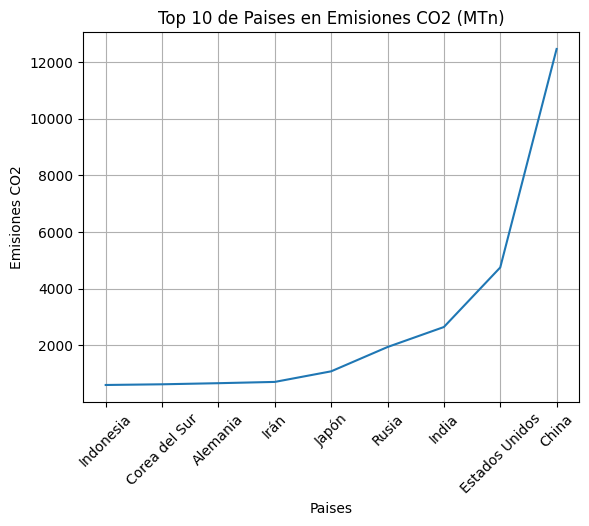

In [6]:
# Calcular las emisiones de los paises mas contaminadores
Emisiones_CO2_Paises_df2 = Emisiones_CO2_Paises_df.sort_values(by='EmisionCO2')

x = Emisiones_CO2_Paises_df2['Paises'].values
y = Emisiones_CO2_Paises_df2['EmisionCO2'].values

# Ploteamos la data
plt.plot(x, y)
plt.xlabel('Paises')
plt.ylabel('Emisiones CO2')
plt.title('Top 10 de Paises en Emisiones CO2 (MTn)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [7]:
Emisiones_CO2_Paises_df.to_parquet("../0-DataSets/3-DatosScrapingConETL/emisiones_CO2_Paises_2023.parquet")

#### Tercer WebScraping 2: página web de **Datos Macro** https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2/usa

Datos de emisiones de EEUU en el tiempo

In [8]:
import requests
from bs4 import BeautifulSoup

#Colores
azul = "\33[1;36m" # Texto azul claro
gris = "\33[0;37m" # Texto gris
blanco = "\33[1;37m" # Texto blanco

def datos_game(url):
    """Devuelve información de un producto de la tienda game"""
    # Inicializamos el diccionario de salida
    d = {}
    try:
        # Cabeceras de la petición HTTP
        headers = {
            "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36"
        }
        # Realizamos la petición
        print(f'{azul}Realizando la petición:{blanco}{url}{gris}')
        req = requests.get(url, headers=headers, timeout=10)
        print(f'{azul}Código de respuesta...:{blanco}{req.status_code}{req.reason}{gris}')
        # Si la petición no fue correcta, devolvemos error
        req.raise_for_status()
        # Creamos un objeto BS4 a partir del código HTML
        soup = BeautifulSoup(req.text, "html.parser")
        # años CO2
        anios = soup.find("table", class_="table-hover").find_all("td", class_="fecha")
        Anios_CO2 = [img.text.strip() for img in anios]
        d["anios"] = Anios_CO2
        # Emisiones en MTn
        emisio = soup.find("table", class_="table-hover").find_all("td", class_="numero")
        emisio_CO2 = [img.text.strip().replace('.', '').replace(',', '.') for img in emisio]
        emisio_CO2 = [emisio_CO2[i] for i in range(len(emisio_CO2)) if i % 3 == 0]
        d["emisiones"] = emisio_CO2
    except requests.exceptions.RequestException as e:
        print(f"{azul}Error al realizar la solicitud HTTP: {e}")
        return {"ERROR": f"Error al realizar la solicitud HTTP: {e}"}
    except Exception as e:
        print(f"{azul}Error inesperado: {e}")
        return {"ERROR": f"Error inesperado: {e}"}
    
    return d

# MAIN
if __name__ == "__main__":
    url = "https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2/usa"
    datos = datos_game(url)
    print(f'{blanco}IMPRIMIENDO DICCIONARIO')
    for clave, valor in datos.items():
        print(f'{azul}{clave.upper()}:{blanco}{valor}{gris}')


Realizando la petición:https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2/usa
Código de respuesta...:200OK
IMPRIMIENDO DICCIONARIO
ANIOS:['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971', '1970']
EMISIONES:['4752.079', '4464.106', '5011.100', '5166.492', '5005.631', '5077.008', '5179.715', '5290.081', '5271.183', '5135.957', '5354.273', '5571.818', '5324.861', '5745.751', '5934.149', '5845.442', '5950.655', '5940.829', '5858.751', '5790.900', '5956.928', '6004.362', '5840.858', '5829.447', '5784.149', '5508.512', '5360.921', '5308.828', '5225.131', '5106.826', '5025.951', '5067.480', '5176.127', '5118.630', '4895.

In [9]:
CO2_tiempoEEUUdf = pd.DataFrame(datos)
CO2_tiempoEEUUdf

,anios,emisiones
0,2021,4752.079
1,2020,4464.106
2,2019,5011.100
3,2018,5166.492
4,2017,5005.631
5,2016,5077.008
6,2015,5179.715
7,2014,5290.081
8,2013,5271.183
9,2012,5135.957


Guardamos el DF

In [10]:
CO2_tiempoEEUUdf.to_parquet("../0-DataSets/3-DatosScrapingConETL/emisiones_CO2_EEUU_1970_2021.parquet")